In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset = pd.read_csv('test_data_evaluation_part2.csv',index_col=0)

In [3]:
data = dataset.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 82590 to 83589
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Nationality           1000 non-null   object 
 2   Age                   967 non-null    float64
 3   DaysSinceCreation     1000 non-null   int64  
 4   AverageLeadTime       1000 non-null   int64  
 5   LodgingRevenue        1000 non-null   float64
 6   OtherRevenue          1000 non-null   float64
 7   BookingsCanceled      1000 non-null   int64  
 8   BookingsNoShowed      1000 non-null   int64  
 9   BookingsCheckedIn     1000 non-null   int64  
 10  PersonsNights         1000 non-null   int64  
 11  RoomNights            1000 non-null   int64  
 12  DaysSinceLastStay     1000 non-null   int64  
 13  DaysSinceFirstStay    1000 non-null   int64  
 14  DistributionChannel   1000 non-null   object 
 15  MarketSegment   

In [5]:
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [6]:
data.size

29000

In [7]:
data.isna().sum()

ID                       0
Nationality              0
Age                     33
DaysSinceCreation        0
AverageLeadTime          0
LodgingRevenue           0
OtherRevenue             0
BookingsCanceled         0
BookingsNoShowed         0
BookingsCheckedIn        0
PersonsNights            0
RoomNights               0
DaysSinceLastStay        0
DaysSinceFirstStay       0
DistributionChannel      0
MarketSegment            0
SRHighFloor              0
SRLowFloor               0
SRAccessibleRoom         0
SRMediumFloor            0
SRBathtub                0
SRShower                 0
SRCrib                   0
SRKingSizeBed            0
SRTwinBed                0
SRNearElevator           0
SRAwayFromElevator       0
SRNoAlcoholInMiniBar     0
SRQuietRoom              0
dtype: int64

In [8]:
data['Age'].fillna(int(data['Age'].mean()),inplace = True)

In [9]:
data['Age'].isna().sum()

0

In [10]:
data.dtypes.value_counts()

int64      23
object      3
float64     3
dtype: int64

In [11]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82594,82595,PRT,39.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
num = list(data.select_dtypes(include=['int64','float64']).keys())
print(num)

['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']


In [13]:
cat = list(data.select_dtypes(include='O').keys())
print(cat)

['Nationality', 'DistributionChannel', 'MarketSegment']


In [14]:
col = data.select_dtypes(include = 'object')

In [15]:
data.Nationality.unique()

array(['SGP', 'PRT', 'PER', 'DEU', 'FRA', 'AGO', 'GBR', 'POL', 'BRA',
       'CHE', 'CAN', 'IRL', 'ESP', 'ITA', 'SAU', 'RUS', 'ATF', 'CHN',
       'FIN', 'USA', 'AUS', 'HRV', 'MOZ', 'NLD', 'IND', 'ROU', 'JPN',
       'KOR', 'VEN', 'DZA', 'UKR', 'AUT', 'VNM', 'SWE', 'ARE', 'ISR',
       'MAR', 'PAK', 'BEL', 'PRY', 'NOR', 'TUN', 'LTU', 'PHL', 'LUX',
       'MLT', 'URY', 'BGR', 'HUN'], dtype=object)

In [16]:
len(data.Nationality.unique())

49

In [17]:
data.DistributionChannel.unique()

array(['Travel Agent/Operator', 'Corporate', 'Direct',
       'Electronic Distribution'], dtype=object)

In [18]:
len(data.DistributionChannel.unique())

4

In [19]:
data.MarketSegment.unique()

array(['Other', 'Corporate', 'Direct', 'Travel Agent/Operator',
       'Aviation', 'Complementary'], dtype=object)

In [20]:
len(data.MarketSegment.unique())

6

In [21]:
encoder = LabelEncoder()

In [22]:
for i in col:
    data[i] = encoder.fit_transform(data[i])

In [23]:
data.dtypes

ID                        int64
Nationality               int32
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel       int32
MarketSegment             int32
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [24]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82590,82591,41,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82591,82592,41,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82592,82593,41,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82593,82594,41,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82594,82595,36,39.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data.corr()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,1.000000,-0.239026,-0.001966,-0.968732,0.144838,0.087113,0.050937,NaN,NaN,-0.056179,...,NaN,0.023863,NaN,-0.038702,0.134060,0.061187,-0.038099,NaN,NaN,0.004957
Nationality,-0.239026,1.000000,-0.128435,0.270088,-0.163346,0.003327,-0.015821,NaN,NaN,0.020016,...,NaN,-0.044632,NaN,-0.024239,-0.053740,-0.044195,-0.059722,NaN,NaN,0.022928
Age,-0.001966,-0.128435,1.000000,-0.017829,0.222932,0.117888,0.148956,NaN,NaN,0.256436,...,NaN,-0.084695,NaN,-0.203160,0.037580,0.048788,0.020300,NaN,NaN,0.053568
DaysSinceCreation,-0.968732,0.270088,-0.017829,1.000000,-0.170182,-0.068476,-0.051745,NaN,NaN,0.061017,...,NaN,-0.043949,NaN,0.015583,-0.154165,-0.076001,0.033371,NaN,NaN,-0.001505
AverageLeadTime,0.144838,-0.163346,0.222932,-0.170182,1.000000,0.306910,0.282330,NaN,NaN,0.560569,...,NaN,0.077480,NaN,-0.033865,0.034569,0.078348,0.015567,NaN,NaN,0.035644
LodgingRevenue,0.087113,0.003327,0.117888,-0.068476,0.306910,1.000000,0.601967,NaN,NaN,0.578248,...,NaN,0.033001,NaN,-0.024338,-0.030208,-0.032311,0.031909,NaN,NaN,0.095857
OtherRevenue,0.050937,-0.015821,0.148956,-0.051745,0.282330,0.601967,1.000000,NaN,NaN,0.458857,...,NaN,-0.015800,NaN,-0.027906,0.023343,-0.044827,-0.003496,NaN,NaN,0.045355
BookingsCanceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BookingsNoShowed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BookingsCheckedIn,-0.056179,0.020016,0.256436,0.061017,0.560569,0.578248,0.458857,NaN,NaN,1.000000,...,NaN,0.002278,NaN,-0.062752,-0.048824,-0.021423,0.019477,NaN,NaN,0.001378


In [27]:
data1=data
y=data1['BookingsCheckedIn']
x=data1.drop(['BookingsCheckedIn'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [28]:
data1

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
82590,82591,41,47.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82591,82592,41,16.0,11,130,483.48,155.1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82592,82593,41,15.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82593,82594,41,12.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82594,82595,36,39.0,11,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,22,54.0,0,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,20,47.0,0,109,327.10,277.5,0,0,1,...,0,0,0,0,1,0,0,0,0,0
83587,83588,20,53.0,0,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,20,85.0,0,109,981.30,9.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [29]:
data1.corr()['BookingsCheckedIn']

ID                     -0.056179
Nationality             0.020016
Age                     0.256436
DaysSinceCreation       0.061017
AverageLeadTime         0.560569
LodgingRevenue          0.578248
OtherRevenue            0.458857
BookingsCanceled             NaN
BookingsNoShowed             NaN
BookingsCheckedIn       1.000000
PersonsNights           0.675850
RoomNights              0.720708
DaysSinceLastStay       0.828057
DaysSinceFirstStay      0.836241
DistributionChannel    -0.085514
MarketSegment          -0.072562
SRHighFloor            -0.017206
SRLowFloor                   NaN
SRAccessibleRoom             NaN
SRMediumFloor                NaN
SRBathtub               0.002278
SRShower                     NaN
SRCrib                 -0.062752
SRKingSizeBed          -0.048824
SRTwinBed              -0.021423
SRNearElevator          0.019477
SRAwayFromElevator           NaN
SRNoAlcoholInMiniBar         NaN
SRQuietRoom             0.001378
Name: BookingsCheckedIn, dtype: float64

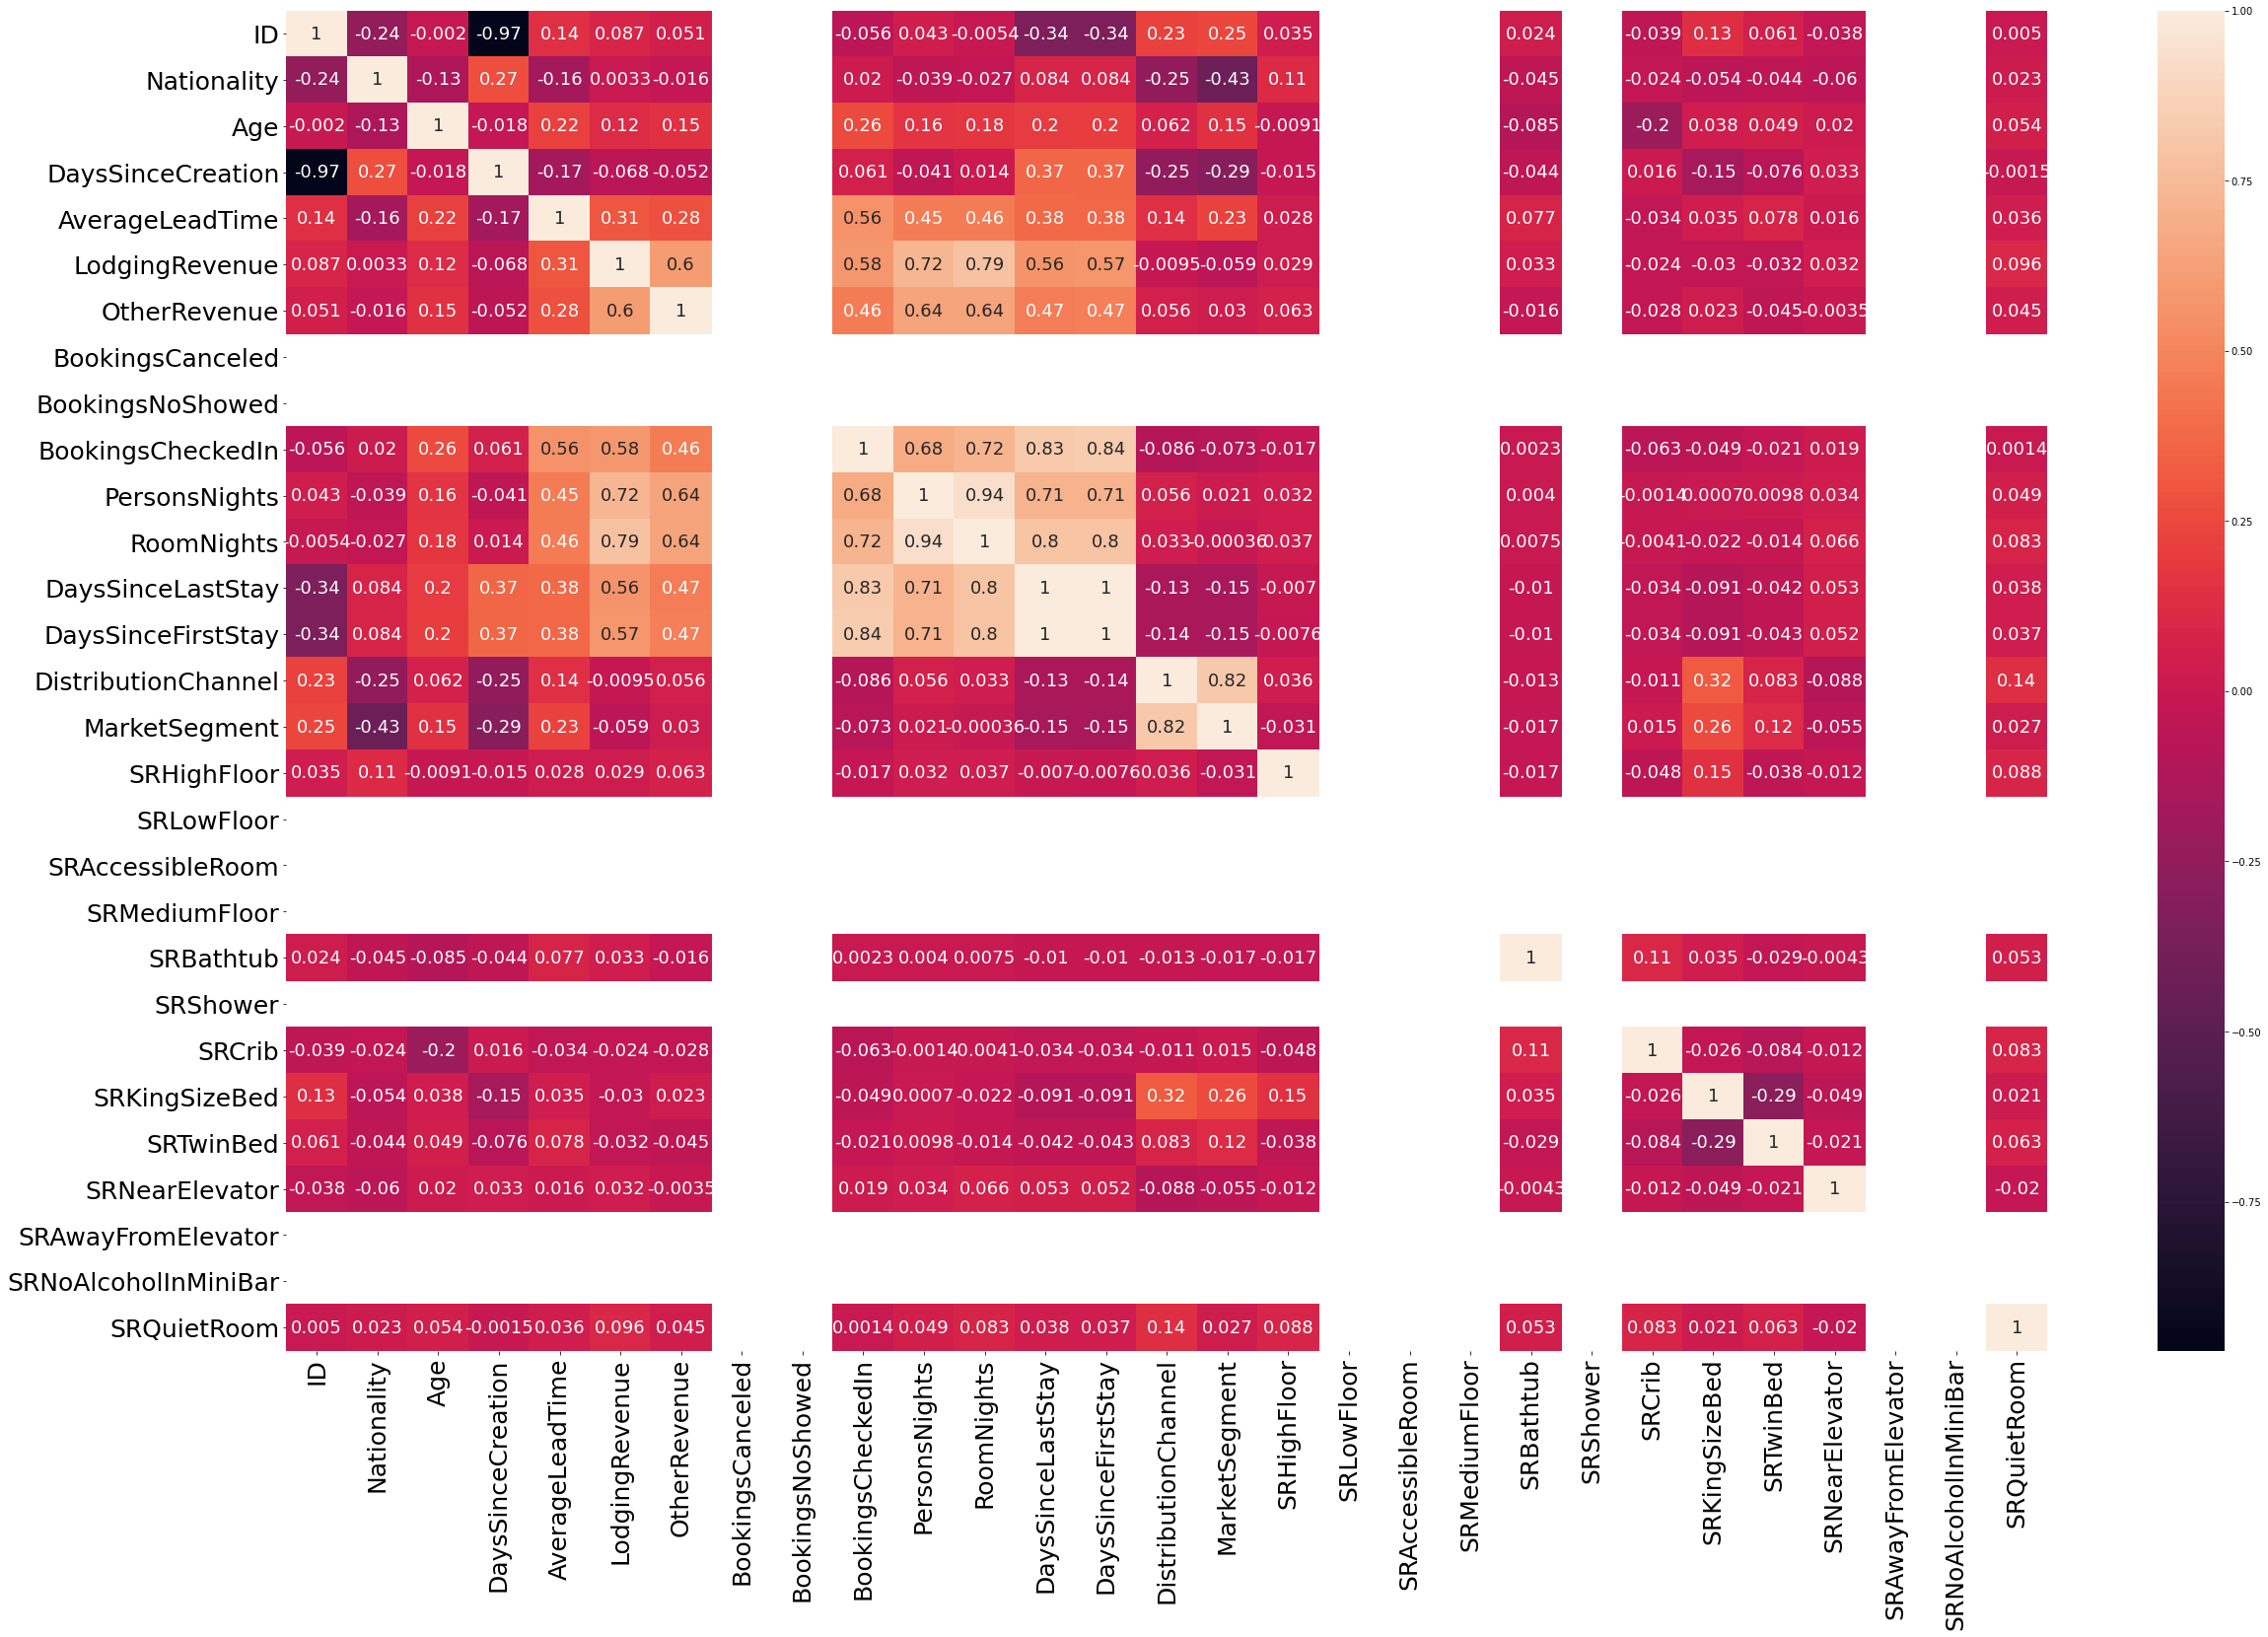

In [30]:
plt.figure(figsize=(40,25))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y.prob=logreg.decision_function(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 5)
print('Score:',acc_log)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 98.8
Confusion matrix:
 [[254   0   0]
 [  2 240   1]
 [  0   3   0]]


C:\Users\SATHISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
logreg_fpr,logreg_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_logreg=auc(logreg_fpr,logreg_tpr)

In [33]:
#Naive bayes classifier
nbc = GaussianNB()
nbc.fit(x_train, y_train)
y_pred = nbc.predict(x_test)
acc_nbc = round(nbc.score(x_test, y_test) * 100, 2)
print('Score:',acc_nbc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 92.4
Confusion matrix:
 [[253   1   0]
 [  0 207  36]
 [  0   1   2]]


In [34]:
nbc_fpr,nbc_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_nbc=auc(nbc_fpr,nbc_tpr)

In [35]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
print('Score:',acc_svc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 50.8
Confusion matrix:
 [[254   0   0]
 [243   0   0]
 [  3   0   0]]


In [36]:
svc_fpr,svc_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_svc=auc(svc_fpr,svc_tpr)

In [37]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
print('Score:',acc_rf)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 99.4
Confusion matrix:
 [[254   0   0]
 [  0 243   0]
 [  0   3   0]]


In [38]:
rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_rf=auc(rf_fpr,rf_tpr)

In [39]:
#knn neghbours
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Score:',acc_knn)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 97.6
Confusion matrix:
 [[254   0   0]
 [  9 234   0]
 [  0   3   0]]


In [40]:
knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_knn=auc(knn_fpr,knn_tpr)

In [41]:
model_names=['Logistic Regression','Naive Bayes Classifier','SVC(Support Vector Classification)','Random Forest','k-Nearest Neighbors']
accuracy=[acc_log,acc_nbc,acc_svc,acc_rf,acc_knn]
auc=[auc_logreg,auc_nbc,auc_svc,auc_rf,auc_knn]
results=pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'AUC':auc})
results

,Model,Accuracy,AUC
0,Logistic Regression,98.8,0.756539
1,Naive Bayes Classifier,92.4,0.881958
2,SVC(Support Vector Classification),50.8,0.500000
3,Random Forest,99.4,0.755533
4,k-Nearest Neighbors,97.6,0.764588
